In [ ]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все описания этих вакансий
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [96]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle 
import pandas as pd
import numpy as np
from datetime import datetime,date
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [97]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 113
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'
res = requests.get(url)

In [98]:
vacancies = res.json()

In [99]:
all_names = []
all_dates = []
all_skills = []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    num_pages = vacancies.get('pages')
    vacancy_name = [el.get('name') for el in vacancies.get('items')]
    vacancy_data = [el.get('published_at') for el in vacancies.get('items')]
    vacancy_skills = [el.get('snippet') for el in vacancies.get('items')]
    all_names.extend(vacancy_name)
    all_dates.extend(vacancy_data)
    all_skills.extend(vacancy_skills)

In [100]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
vacancy=pd.DataFrame(list(zip(all_names, all_dates,all_skills)),
               columns =['Name', 'Date','Skills'])
vacancy['Quantity']=1

In [101]:
# Переведите даты публикаций в datetime
vacancy['Date'] = pd.to_datetime(vacancy['Date']).dt.date
vacancy['Skills'] = pd.DataFrame(all_skills, columns=['requirement'])
vacancy

,Name,Date,Skills,Quantity
0,Старший охранник,2021-09-21,Образование не ниже средне-специального. Опыт ...,1
1,Клиентский менеджер,2021-09-02,Имеешь образование от общего среднего. Умеешь ...,1
2,Java Разработчик,2021-09-20,Java 8. Spring. Maven. Jenkins. Pipeline. Dock...,1
3,Клиентский менеджер прямых продаж,2021-08-28,Легко находите общий язык с людьми. Умеете выс...,1
4,Старший клиентский менеджер,2021-09-03,Специалист со средним профессиональным/неполны...,1
...,...,...,...,...
1995,Клиентский менеджер прямых продаж,2021-09-13,Хочешь развивать навыки публичных выступлений....,1
1996,Старший менеджер по обслуживанию,2021-09-06,Специалист со средним профессиональным/неполны...,1
1997,Разработчик JavaScript Junior,2021-09-22,Умеешь читать чужой код и имеешь базовые знани...,1
1998,Менеджер по подключению партнеров к Сбер ID,2021-09-03,Понимать как работает взаимодействие по API. О...,1


Text(0, 0.5, 'Количество')

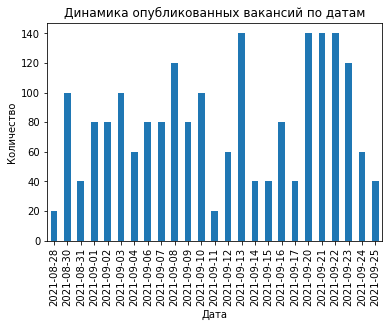

In [102]:
# Постройте график опубликованных вакансий по датам
vacancy_1 = vacancy.groupby(['Date'])['Quantity'].sum()
vacancy_1.plot(kind='bar',title='Динамика опубликованных вакансий по датам')
plt.xlabel('Дата')
plt.ylabel('Количество')

In [103]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
vacancy['Date'] = pd.to_datetime(vacancy['Date'])
vacancy['day_of_week'] = vacancy['Date'].dt.day_name()
vacancy_2 = vacancy.groupby(['day_of_week'])['Quantity'].sum()
vacancy_2

day_of_week
Friday       300
Monday       460
Saturday     140
Sunday        60
Thursday     360
Tuesday      300
Wednesday    380
Name: Quantity, dtype: int64

In [105]:
# Найдите те вакансии с использованием python, которые вам интересны
vacancy_like = vacancy.loc[(vacancy.Name.str.contains(r'Клиентский менеджер$'))]
vacancy_like

,Name,Date,Skills,Quantity,day_of_week
1,Клиентский менеджер,2021-09-02,Имеешь образование от общего среднего. Умеешь ...,1,Thursday
14,Клиентский менеджер,2021-09-03,Специалист с образованием от общего среднего. ...,1,Friday
38,Клиентский менеджер,2021-09-22,Специалист с образованием от общего среднего. ...,1,Wednesday
42,Клиентский менеджер,2021-09-04,Имеешь образование от общего среднего. Умеешь ...,1,Saturday
44,Клиентский менеджер,2021-09-12,Специалист с образованием от общего среднего. ...,1,Sunday
...,...,...,...,...,...
1975,Клиентский менеджер,2021-09-13,Имеешь образование от общего среднего. Умеешь ...,1,Monday
1976,Клиентский менеджер,2021-09-25,Имеешь образование от общего среднего. Умеешь ...,1,Saturday
1978,Клиентский менеджер,2021-09-13,Специалист с образованием от общего среднего. ...,1,Monday
1992,Клиентский менеджер,2021-09-08,Имеешь образование от общего среднего. Умеешь ...,1,Wednesday


In [93]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий


In [95]:
vacancy_like.groupby('Skills').sum().reset_index()

,Skills,Quantity
0,Имеешь образование от общего среднего. Умеешь ...,120
1,Специалист с образованием от общего среднего. ...,140


<AxesSubplot:xlabel='Quantity', ylabel='Name'>

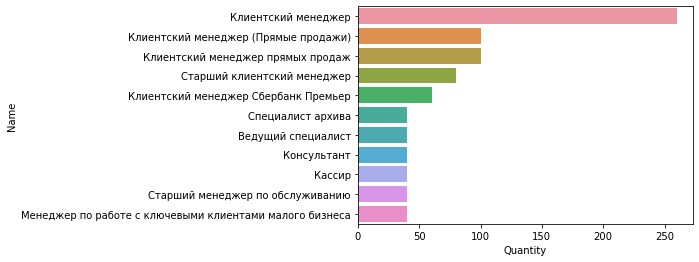

In [106]:
# Постройте график наиболее востребованных вакансий
vacancy_3 = vacancy.groupby('Name').sum().reset_index()
vacancy_3 = vacancy_3.sort_values(by=['Quantity'],ascending =[False])
vacancy_4=vacancy_3.loc[vacancy_3['Quantity'] >= 21]
sns.barplot(data=vacancy_4,x='Quantity',y='Name')